In [1]:
__author__ = 'Anastasia Tsvetkova'
__email__  = 'tsvetkova.lea@gmail.com'

import os
import sys
import yaml, h5py
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

%config InlineBackend.figure_format='retina' # very useful command for high-res images
%matplotlib inline

SEED=42
np.random.seed(SEED)

In [2]:
# set the username for the path of the files:
user='LB'
#user='AF'
#user='MM'
#user='bach
if user=='bach':
    sys.path.append('/home/bazzanini/PYTHON/genetic/lc_pulse_avalanche/statistical_test')
    sys.path.append('/home/bazzanini/PYTHON/genetic/lc_pulse_avalanche/lc_pulse_avalanche')
elif user=='LB':
    sys.path.append('/Users/lorenzo/Documents/UNIVERSITA/Astrophysics/PYTHON/GRBs/lc_pulse_avalanche/statistical_test')
    sys.path.append('/Users/lorenzo/Documents/UNIVERSITA/Astrophysics/PYTHON/GRBs/lc_pulse_avalanche/lc_pulse_avalanche')
elif user=='AF':
    sys.path.append('.../lc_pulse_avalanche/statistical_test')
    sys.path.append('.../lc_pulse_avalanche/lc_pulse_avalanche')
elif user=='MM':
    sys.path.append('/home/manuele/geneticgrbs/geneticgrbs-5metrics/statistical_test')
    sys.path.append('/home/manuele/geneticgrbs/geneticgrbs-5metrics/lc_pulse_avalanche')
else:
    raise ValueError('Assign to the variable "user" a correct username!')

from statistical_test import *
from avalanche import LC, Restored_LC

N.B.: 
- We have to redefine the LC object every time we generate a light curve, otherwise the background will accumulate, and dominate over the "true" simulated GRB signal.

---

The 7 parameters to be optimized are:
- `mu`
- `mu0`
- `alpha`
- `delta1`
- `delta2`
- `tau_min`
- `tau_max`

---

In [3]:
instrument = 'batse'
#instrument = 'swift'
#instrument = 'sax'
if instrument=='batse':
    res      = 0.064 # time resolution of the light curves [s]
    eff_area = 2025  # effective area of instrument [cm2]
    bg_level = 2.8 # background level [cnt/cm2/s]
elif instrument=='swift':
    res      = 0.064            # time resolution of the light curves [s]
    eff_area = 1400             # effective area of instrument [cm2]
    bg_level = (10000/eff_area) # background level [cnt/cm2/s]
elif instrument=='sax':
    res      = 0.0078125       # time resolution of the light curves [s]
    eff_area = 420             # effective area of instrument [cm2]
    bg_level = (1000/eff_area) # background level [cnt/cm2/s]
else:
    raise NameError('Variable "instrument" not defined properly; choose between: "batse", "swift", "sax".')


# The values of the 7 parameters from the paper [Stern & Svensson, 1996] are
mu=1.2
mu0=1
alpha=4
delta1=-0.5
delta2=0
tau_min=0.02
tau_max=26


n_cut=2000     # maximum number of pulses in avalanche (useful to speed up the 
               # simulations but in odds with the "classic" approach). 
               # CHECK THAT THE FINAL RESULT IS NOT INFLUENCED BY THIS CUT! 
with_bg=False  # generate lc without the background added

### Let's generate several light curves

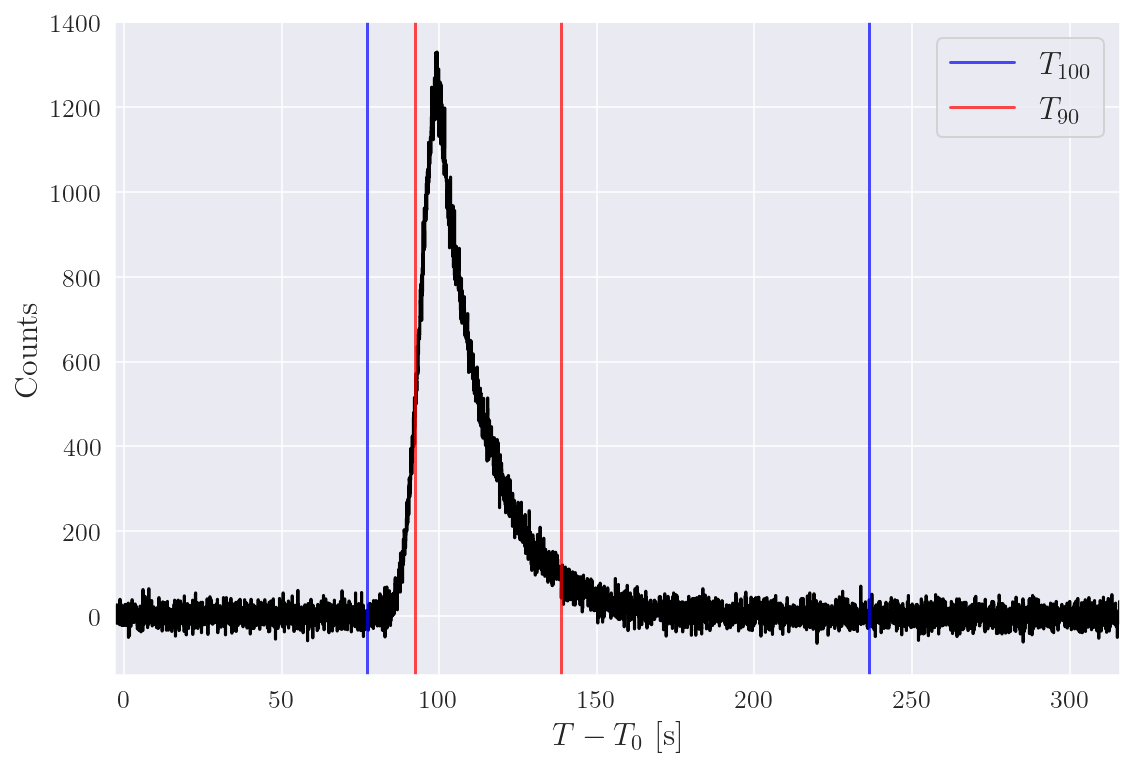

N of pulses: 1
bg (cnt) = 362.88
max norm (cnt) = 1244.7513851417586
T100 [s] = 159.35999999999999
T90  [s] = 46.335999999999984


In [34]:
lc = LC(mu=mu,
        mu0=mu0,
        alpha=alpha,
        delta1=delta1,
        delta2=delta2,
        tau_min=tau_min,
        tau_max=tau_max,
        res=res,
        eff_area=eff_area,
        bg_level=bg_level,
        n_cut=n_cut,
        with_bg=False,
        verbose=False) 
lc.generate_avalanche(seed=None)

# print( len(lc._plot_lc) )
lc.plot_lc(save=False,
           show_duration=True,
           rescale=True)

ampl_cnts_list = []
for params in lc._lc_params:
    tau  = params['tau']
    ampl = params['norm']
    if params['tau']>lc._res:
        ampl_cnts = ampl * lc._res
    else:
        ampl_cnts = ampl * tau
    ampl_cnts_list.append(ampl_cnts) 

print('N of pulses:', lc._n_pulses)
print('bg (cnt) =', lc._bg * lc._res)
print('max norm (cnt) =', np.max(ampl_cnts_list))
print('T100 [s] =', lc._t100)
print('T90  [s] =', lc._t90)
#print(lc._lc_params)

In [ ]:
# test execution time

test_execution_time=False

if test_execution_time:
    lc = LC(mu=mu,
            mu0=mu0,
            alpha=alpha,
            delta1=delta1,
            delta2=delta2,
            tau_min=tau_min, 
            tau_max=tau_max,
            res=res,
            eff_area=eff_area,
            bg_level=bg_level,
            n_cut=n_cut,
            verbose=False) 

    %timeit lc.generate_avalanche(seed=None) # ~4 ms per lc

The quantity `LC._plot_lc` contains the final light curve

--------------------------------------------------------------------------
Number of spontaneous (primary) pulses: 5
Total number of child pulses          : 77
---
Total number of pulses                : 82
--------------------------------------------------------------------------
Number of spontaneous (primary) pulses: 5
Total number of child pulses          : 77
---
Total number of pulses                : 82


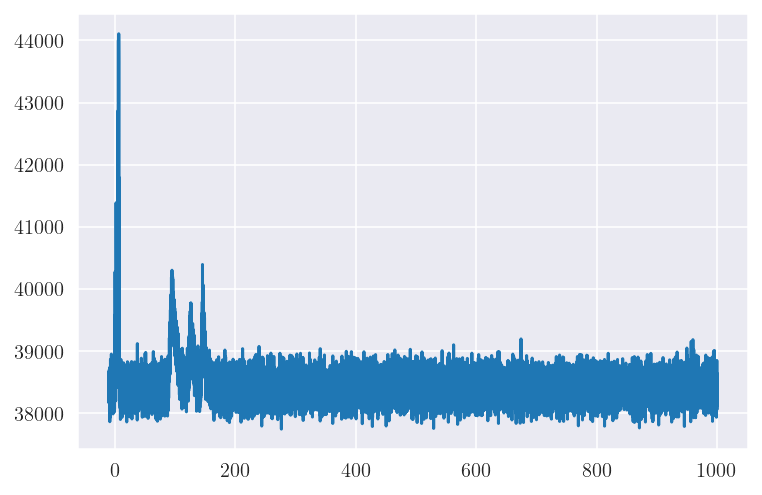

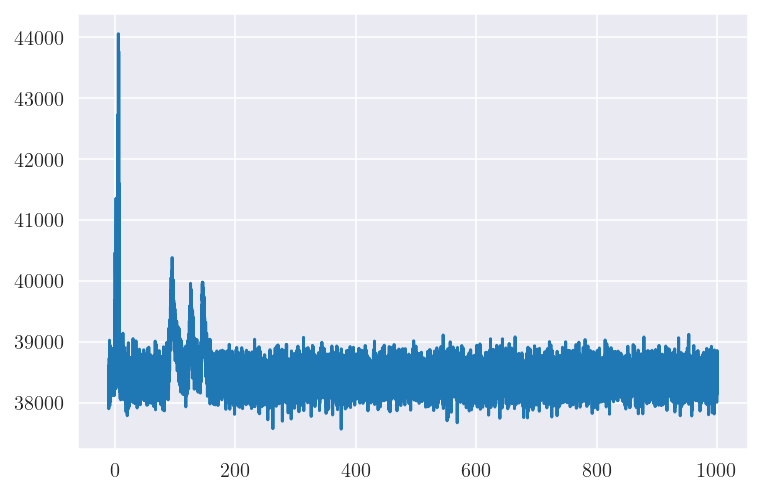

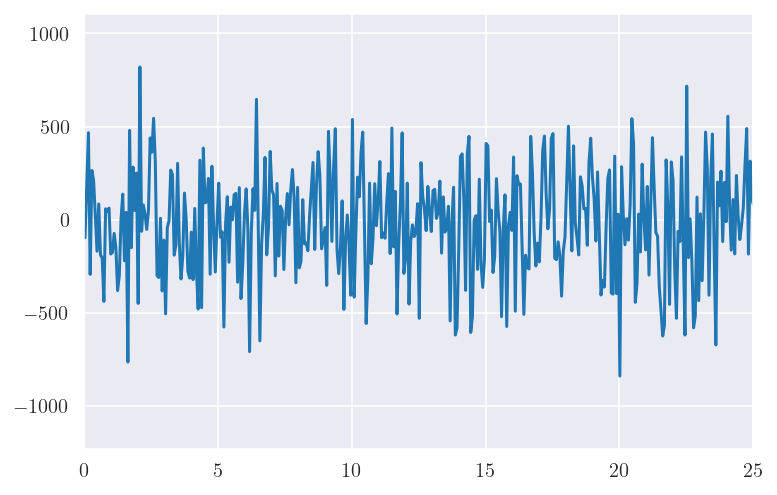

In [8]:
n_cut_1=10000
n_cut_2=100

lc1 = LC(mu=mu,
         mu0=mu0,
         alpha=alpha,
         delta1=delta1,
         delta2=delta2,
         tau_min=tau_min, 
         tau_max=tau_max,
         res=res,
         eff_area=eff_area,
         bg_level=bg_level,
         n_cut=n_cut_1)
lc2 = LC(mu=mu,
         mu0=mu0,
         alpha=alpha,
         delta1=delta1,
         delta2=delta2,
         tau_min=tau_min, 
         tau_max=tau_max,
         res=res,
         eff_area=eff_area,
         bg_level=bg_level,
         n_cut=n_cut_2)
            
par_1 = lc1.generate_avalanche(seed=SEED+3)
par_2 = lc2.generate_avalanche(seed=SEED+3)

plt.plot(lc1._times, lc1._plot_lc)
plt.show()

plt.plot(lc2._times, lc2._plot_lc)
plt.show()

plt.plot(lc1._times, lc1._plot_lc-lc2._plot_lc) 
# maybe the difference is not zero due to poissonian background;
# try to fix the seed also there and see if it disappears... 
plt.xlim(0, 25)
plt.show()

In [9]:
print(lc1._ampl)

0.5021942016886071


In [12]:
def export_lc(LC, idx, instrument, path='../simulations/'):
    """
    Export the simulated light curves in a file with these columns: 
        times, counts, err_counts, T90.
    Input:
    - LC: object that contains the light curve;
    - idx: number of the light curve;
    - instrument: string with the name of the instrument;
    - path: path where to store the results of the simulations;
    """
    outfile  = path+instrument+'/'+'lc'+str(idx)+'.txt'
    savefile = open(outfile, 'w')
    times    = LC._times
    lc       = LC._plot_lc
    err_lc   = LC._err_lc
    T90      = LC._t90
    for i in range(len(times)):
        savefile.write('{0} {1} {2} {3}\n'.format(times[i], lc[i], err_lc[i], T90))
    savefile.close()

## SIMULATE AND EXPORT GRBs

In [17]:
j=0
with_bg=False
N_grb=1000

grb_list_sim  = []

while (j<N_grb):
    lc = LC(# 7 parameters
            mu=mu,
            mu0=mu0,
            alpha=alpha,
            delta1=delta1,
            delta2=delta2,
            tau_min=tau_min, 
            tau_max=tau_max,
            ### instrument parameters:
            res=res,
            eff_area=eff_area,
            bg_level=bg_level,
            ### other parameters:
            n_cut=n_cut,
            with_bg=with_bg) 
    lc.generate_avalanche(seed=None)
    # save only lc with T90 > 2 sec
    if (lc._t90>2):
        export_lc(LC=lc, idx=j, instrument='sax')
        grb_list_sim.append(lc)
        j+=1
    del(lc)

--------------------------------------------------------------------------
Number of spontaneous (primary) pulses: 1
Total number of child pulses          : 7
---
Total number of pulses                : 8
--------------------------------------------------------------------------
Number of spontaneous (primary) pulses: 1
Total number of child pulses          : 11
---
Total number of pulses                : 12
--------------------------------------------------------------------------
Number of spontaneous (primary) pulses: 1
Total number of child pulses          : 568
---
Total number of pulses                : 569
--------------------------------------------------------------------------
Number of spontaneous (primary) pulses: 1
Total number of child pulses          : 0
---
Total number of pulses                : 1
--------------------------------------------------------------------------
Number of spontaneous (primary) pulses: 1
Total number of child pulses          : 0
---
Total numbe

### Export file with data

In [7]:
lc.hdf5_lc_generation(outfile="./test.h5", overwrite=True, seed=17)

In [9]:
filename = "./test.h5"

with h5py.File(filename, "r") as hf:
    data = np.array(hf.get('GRB_PARAMETERS/GRB_1')[:])
    hf['GRB_PARAMETERS/GRB_1'].attrs.keys()
    n_pulses  = hf['GRB_PARAMETERS/GRB_1'].attrs['N_PULSES']
    peak_flux = hf['GRB_PARAMETERS/GRB_1'].attrs['PEAK_VALUE']
    
data.shape

(8246, 4)

In [11]:
hf

<Closed HDF5 file>

### Let's open a yaml-file with avalanches and plot the T90 distribution for the sample

In [2]:
with open("./avalanche_parameters.yml", 'r') as f:
        loaded_data = yaml.safe_load(f)

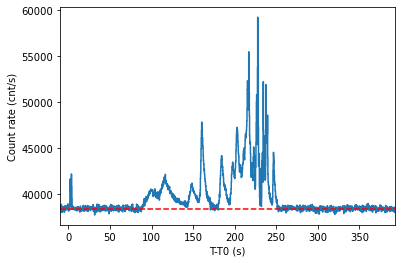

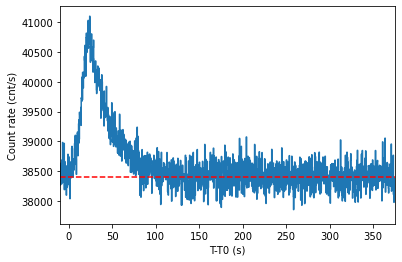

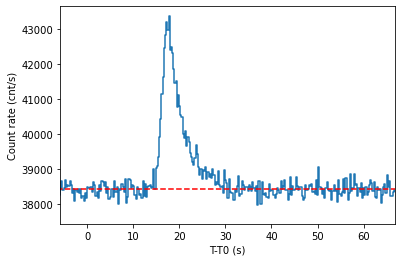

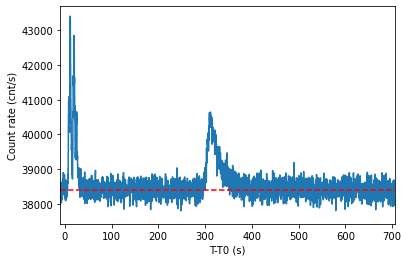

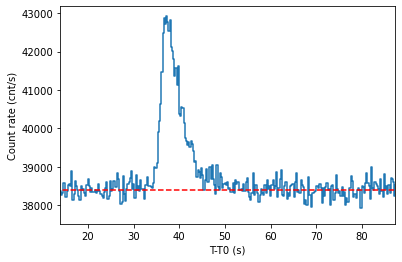

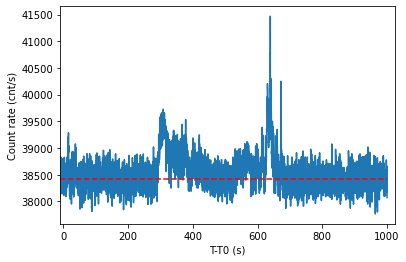

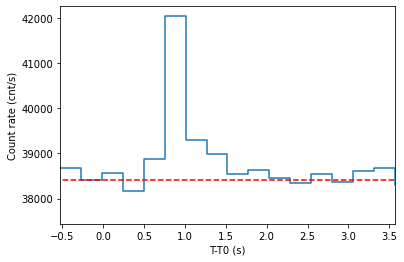

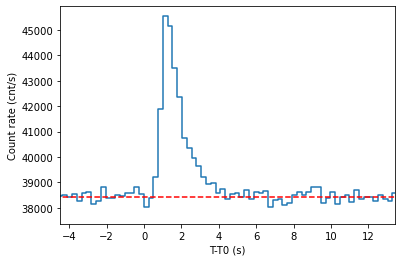

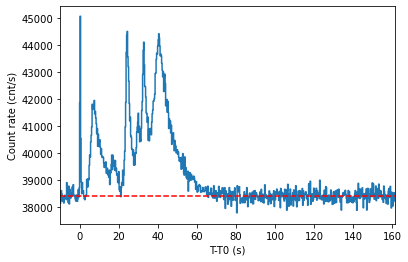

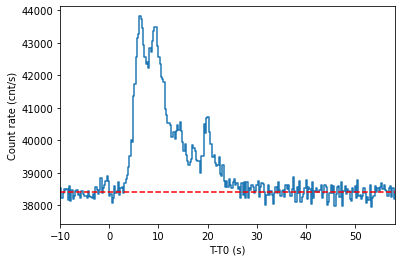

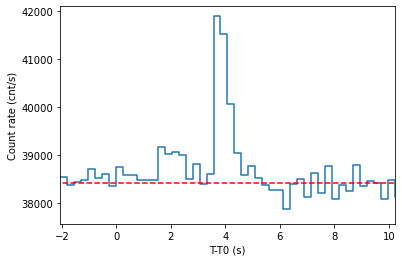

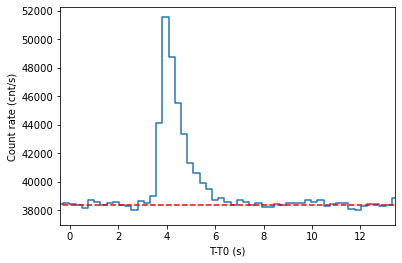

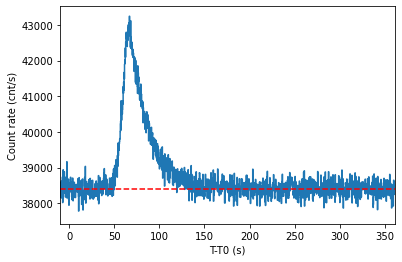

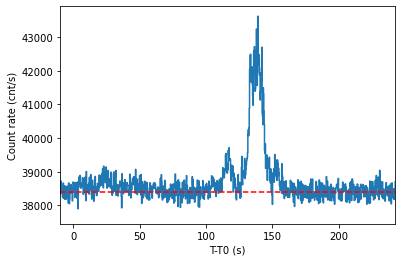

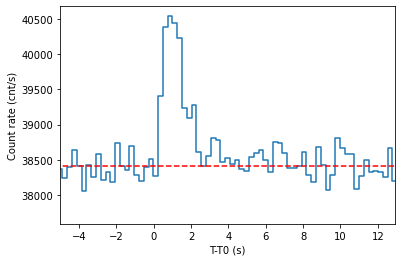

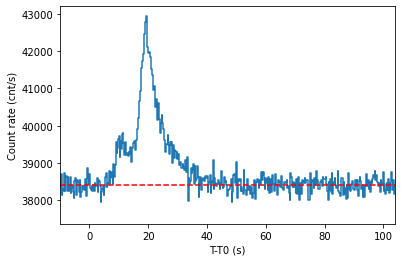

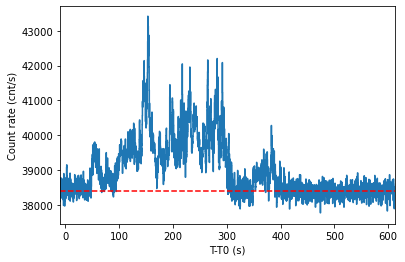

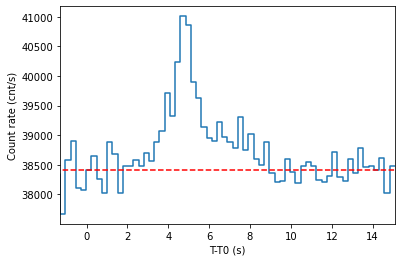

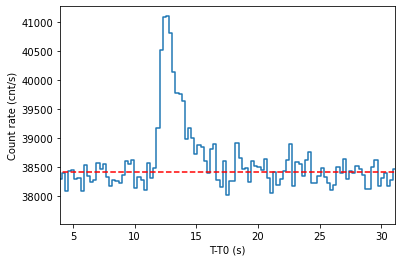

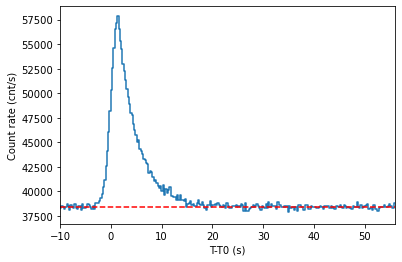

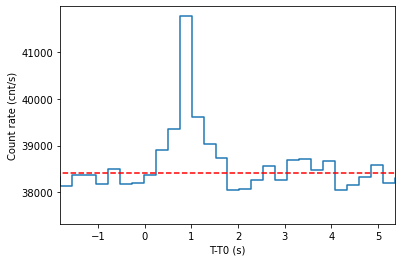

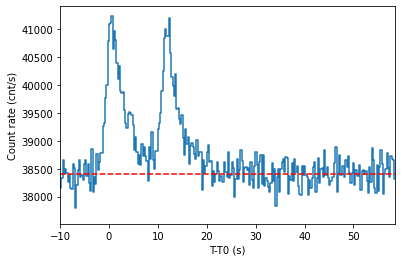

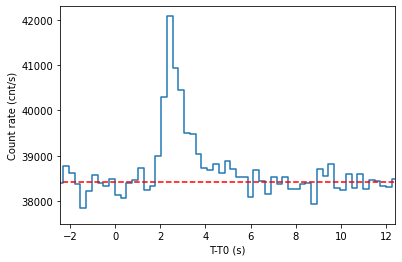

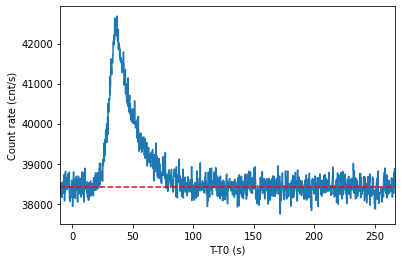

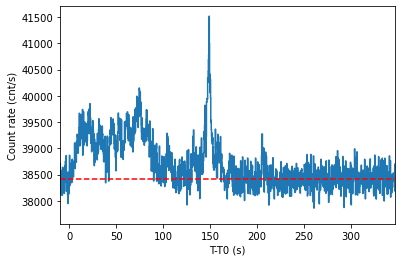

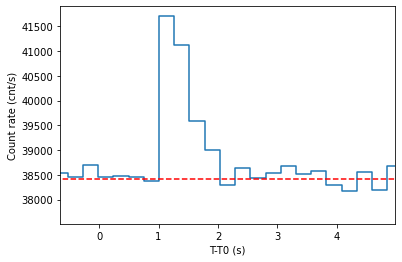

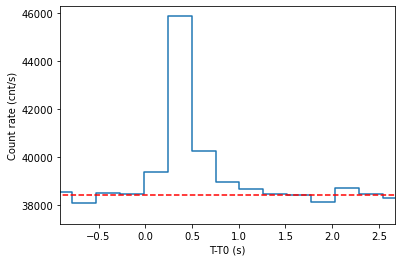

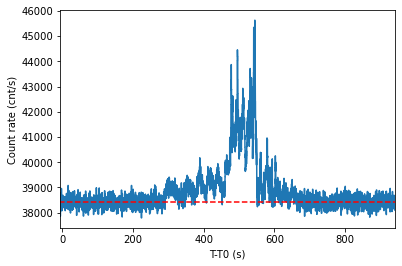

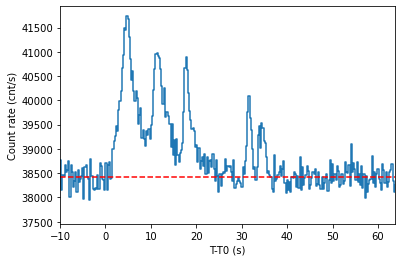

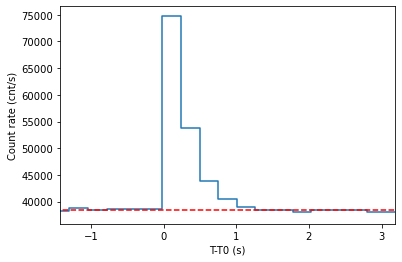

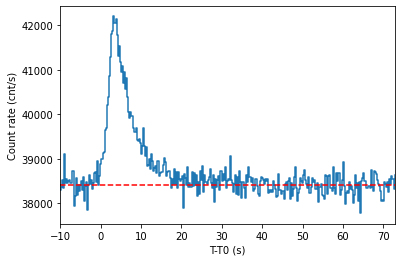

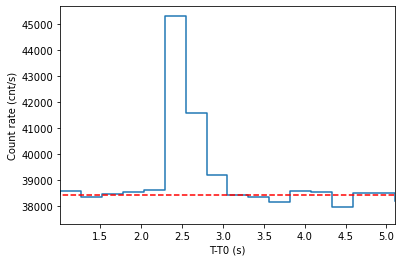

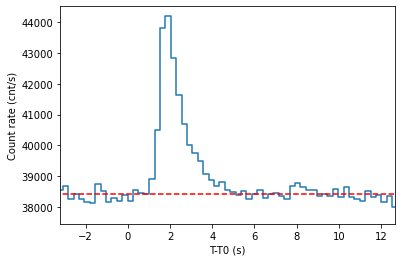

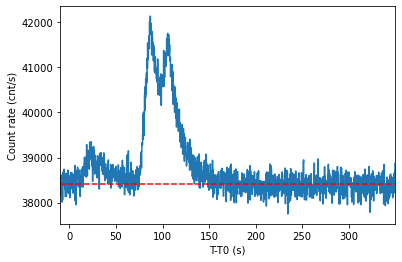

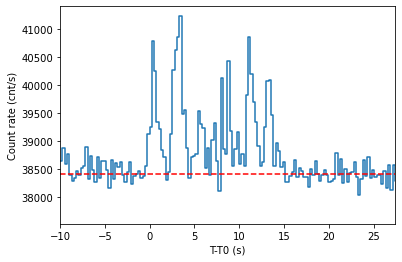

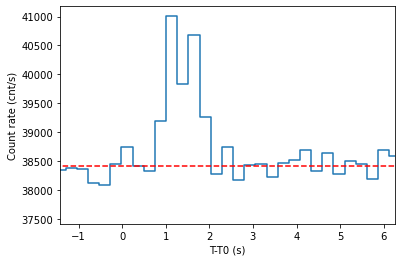

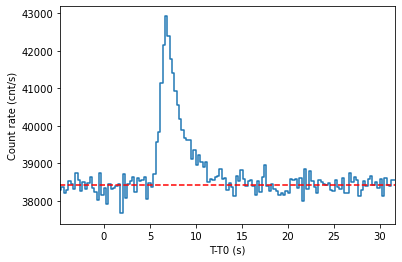

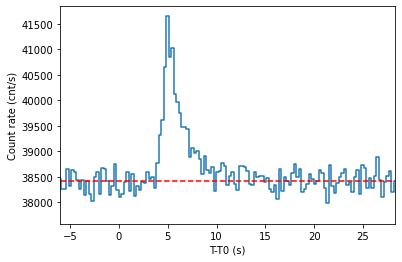

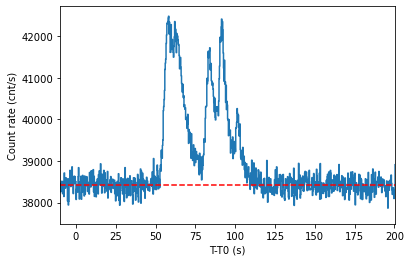

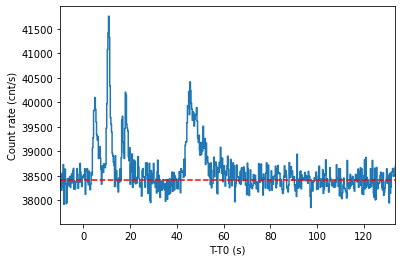

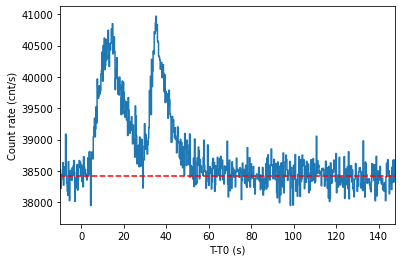

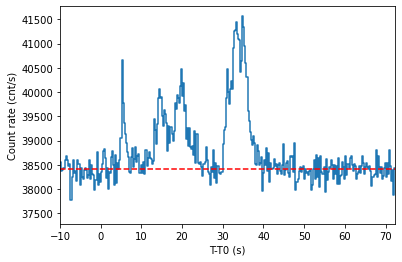

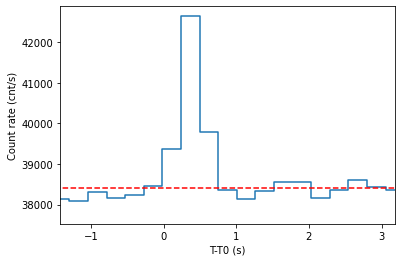

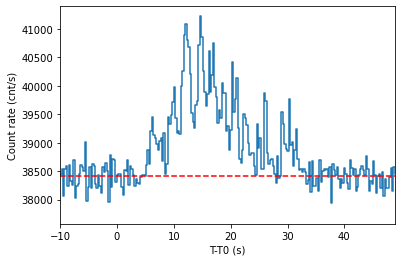

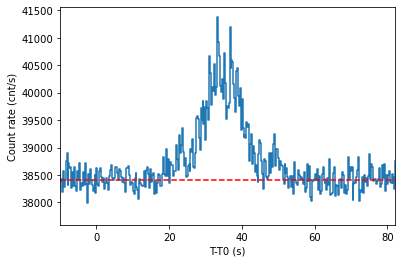

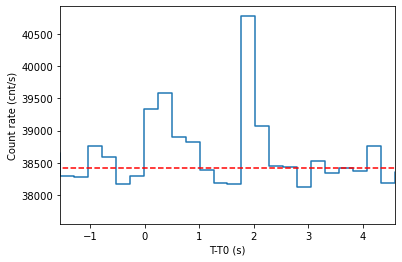

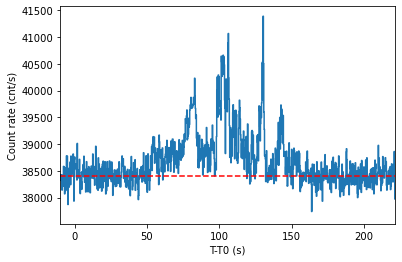

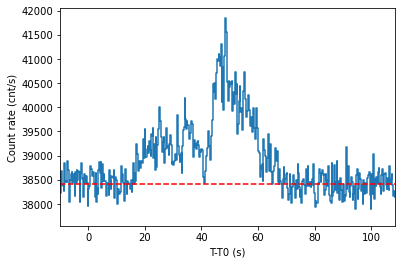

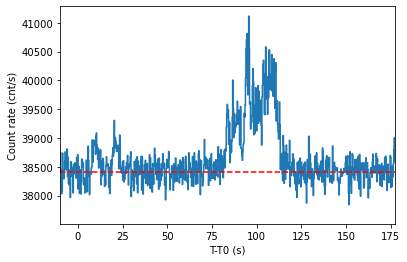

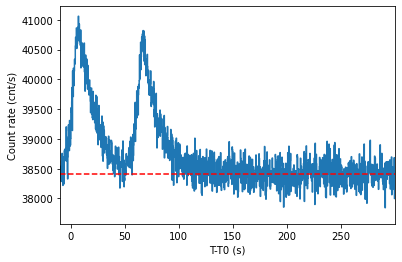

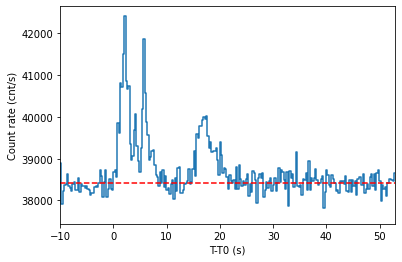

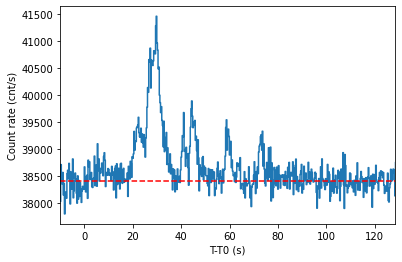

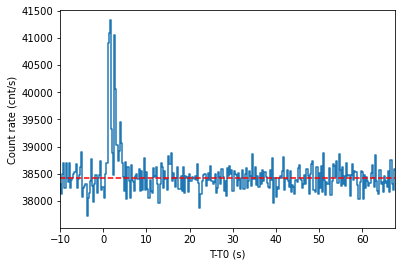

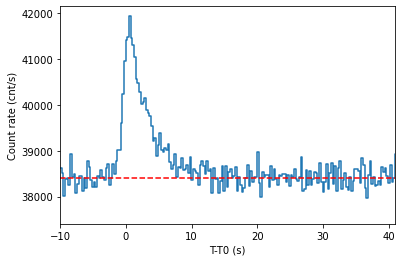

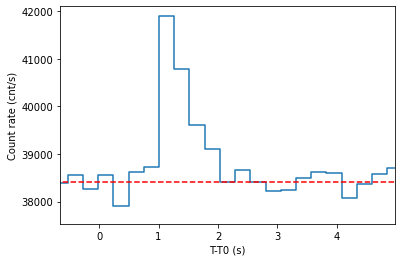

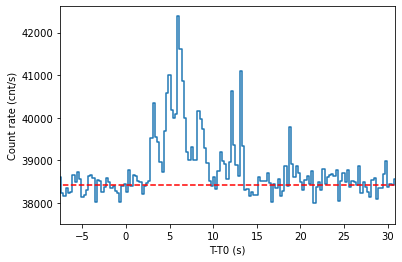

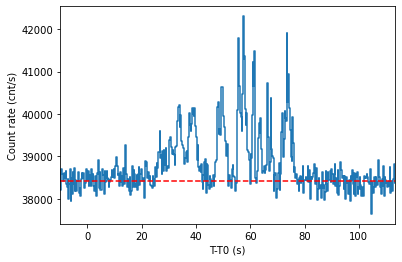

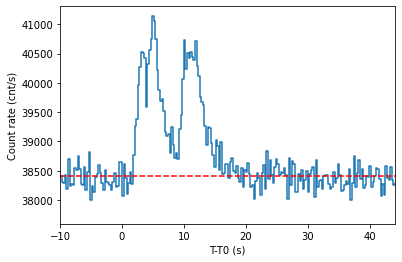

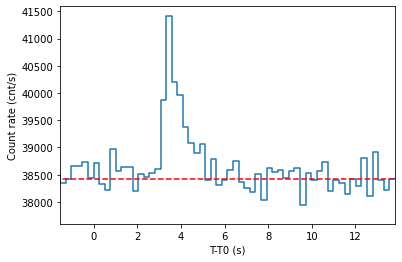

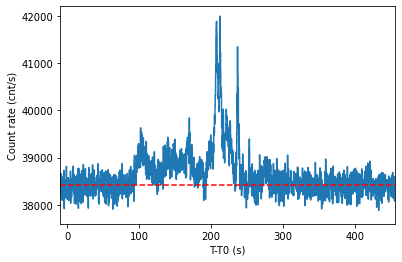

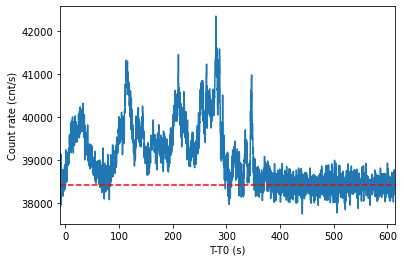

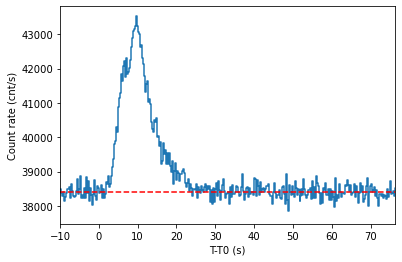

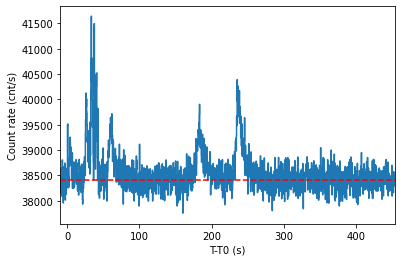

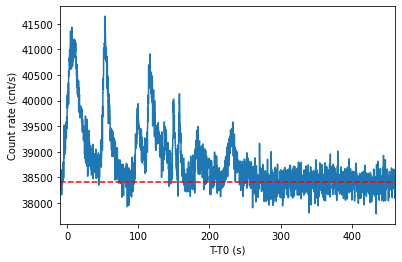

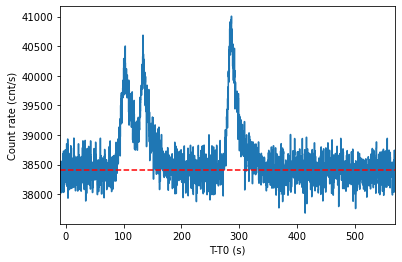

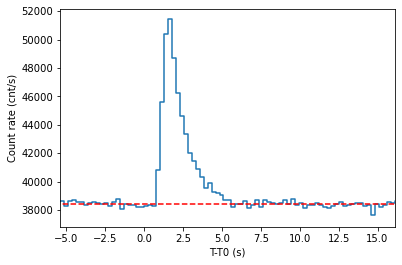

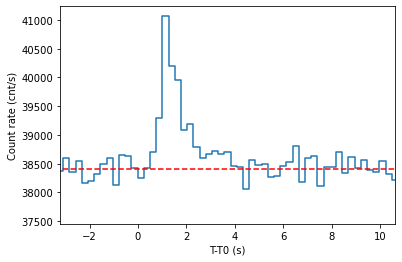

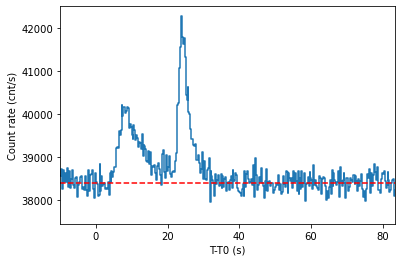

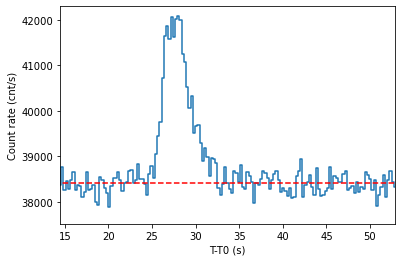

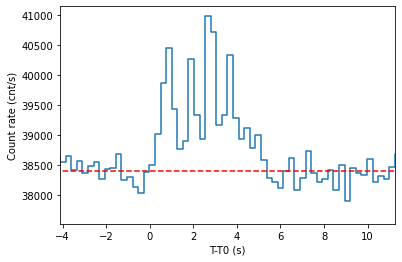

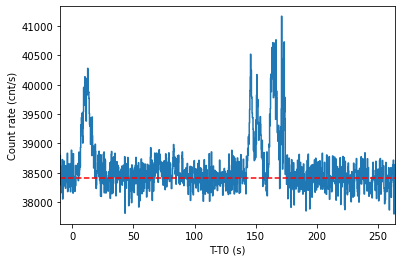

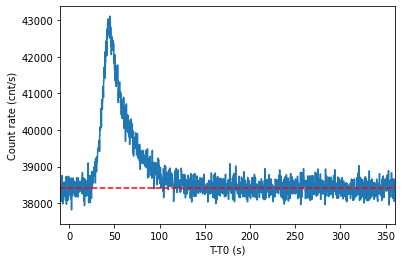

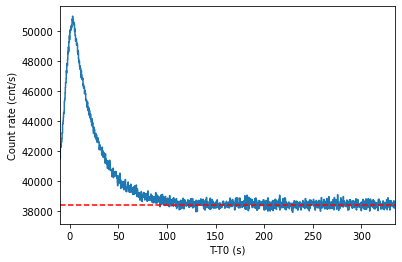

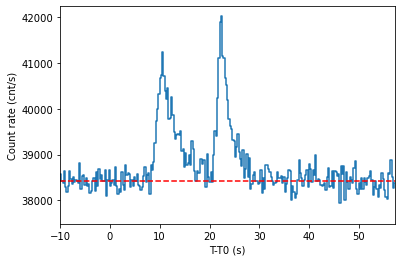

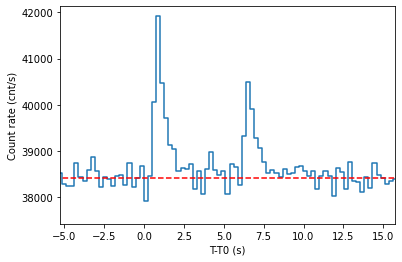

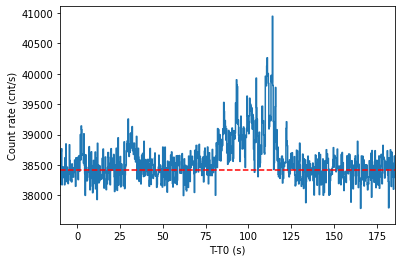

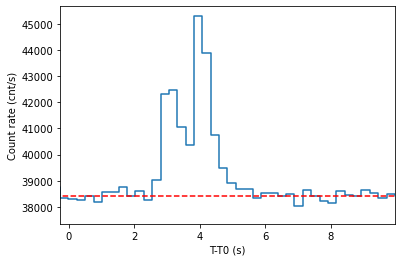

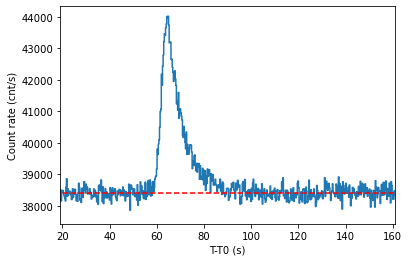

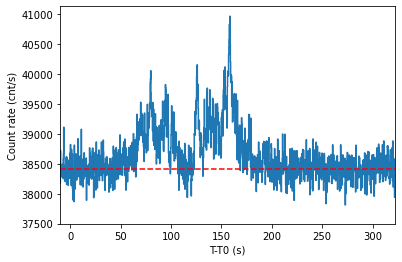

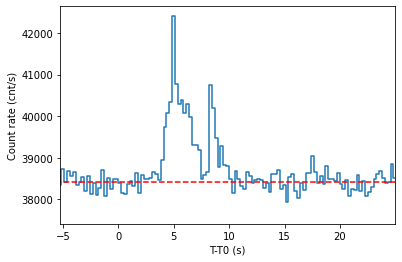

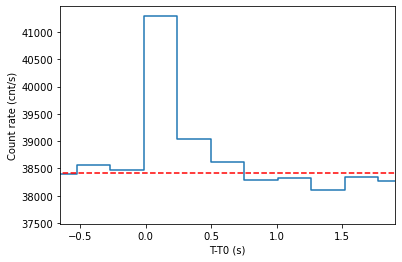

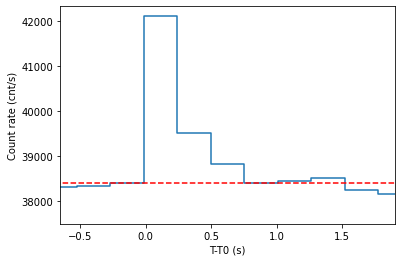

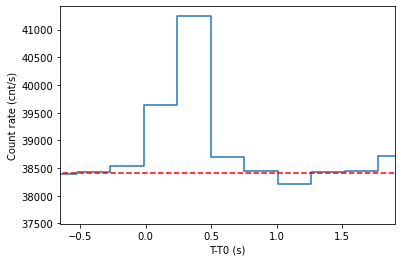

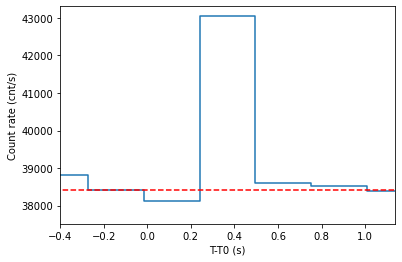

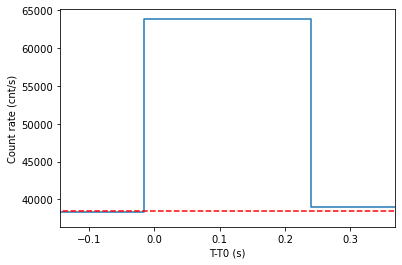

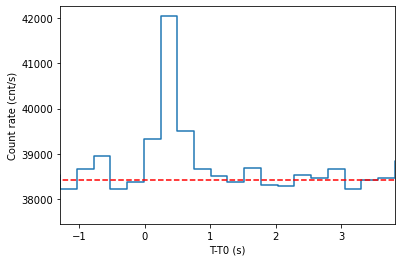

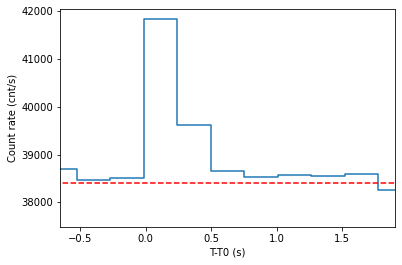

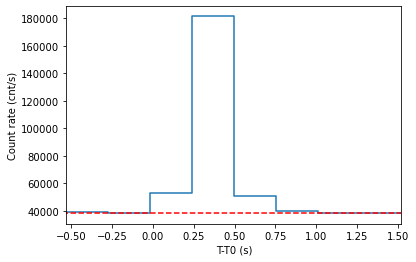

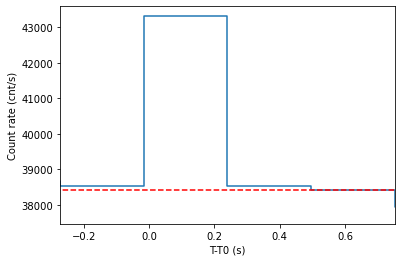

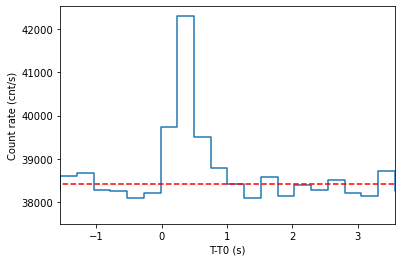

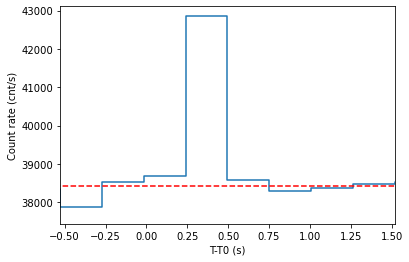

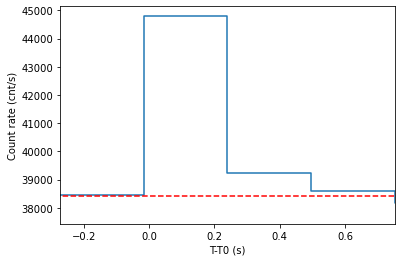

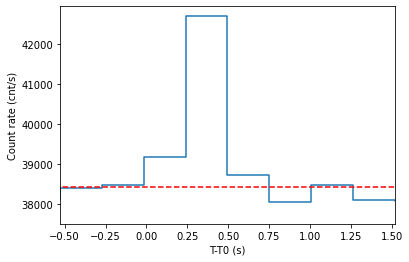

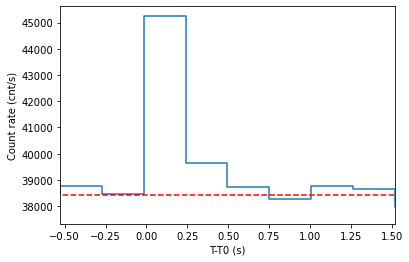

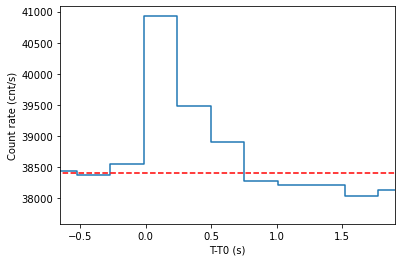

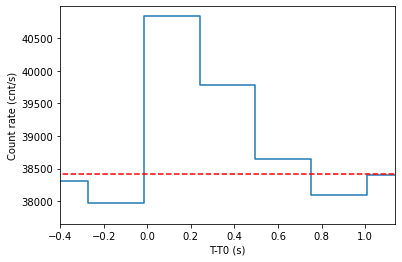

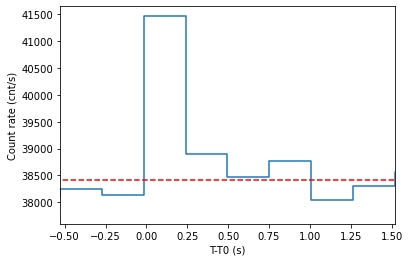

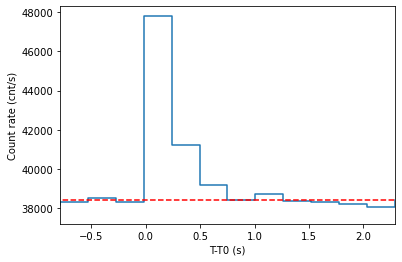

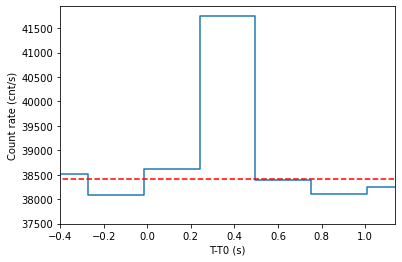

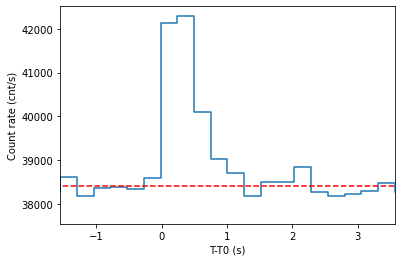

In [5]:
T90 = list()

for name in loaded_data:
    par_list=list(name.values())[0]
    lc=Restored_LC(par_list)
    lc._with_bg=True
    lc.plot_lc()
    T90.append(float(lc.T90[0]))

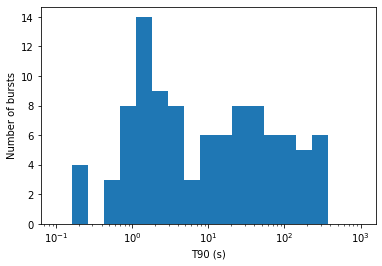

In [4]:
plt.hist(T90, bins=np.geomspace(0.1,1000,20))
plt.xlabel("T90 (s)")
plt.ylabel("Number of bursts")
plt.xscale('log')
plt.show()